In [10]:
import numpy as np 
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [11]:
# MNIST
# 10 classes: digits 0-9
(train_images_mnist, train_labels_mnist), (test_images_mnist, test_labels_mnist) = datasets.mnist.load_data()
train_images_mnist = train_images_mnist.astype("float32")/255.0
test_images_mnist  = test_images_mnist.astype("float32")/255.0
train_images_mnist = train_images_mnist.reshape((-1, 28, 28, 1))
test_images_mnist  = test_images_mnist.reshape((-1, 28, 28, 1))

print(train_images_mnist.shape, test_images_mnist.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [12]:
# CIFAR-10
# 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck
(train_images_cifar, train_labels_cifar), (test_images_cifar, test_labels_cifar) = datasets.cifar10.load_data()
train_images_cifar = train_images_cifar.astype("float32")/255.0
test_images_cifar  = test_images_cifar.astype("float32")/255.0

print(train_images_cifar.shape, test_images_cifar.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [13]:
# using CNN
def build_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes)
    ])
    return model

In [14]:
# MNIST
model_mnist = build_cnn((28,28,1), 10)
model_mnist.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

# CIFAR-10
model_cifar = build_cnn((32,32,3), 10)
model_cifar.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [15]:
history_mnist = model_mnist.fit(
    train_images_mnist, 
    train_labels_mnist, 
    epochs=10, 
    validation_data=(test_images_mnist, test_labels_mnist),
    verbose=2
)


Epoch 1/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9548 - loss: 0.1483 - val_accuracy: 0.9799 - val_loss: 0.0643
Epoch 2/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9860 - loss: 0.0460 - val_accuracy: 0.9871 - val_loss: 0.0359
Epoch 3/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9901 - loss: 0.0315 - val_accuracy: 0.9879 - val_loss: 0.0349
Epoch 4/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9922 - loss: 0.0248 - val_accuracy: 0.9887 - val_loss: 0.0319
Epoch 5/10
1875/1875 - 10s - 6ms/step - accuracy: 0.9942 - loss: 0.0181 - val_accuracy: 0.9915 - val_loss: 0.0296
Epoch 6/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9948 - loss: 0.0150 - val_accuracy: 0.9901 - val_loss: 0.0291
Epoch 7/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9963 - loss: 0.0115 - val_accuracy: 0.9905 - val_loss: 0.0312
Epoch 8/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9969 - loss: 0.0099 - val_accuracy: 0.9907 - val_loss: 0.0344
Epoch 9/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9970 - loss: 0.0088 - val_accuracy: 0

In [16]:
history_cifar = model_cifar.fit(
    train_images_cifar, 
    train_labels_cifar, 
    epochs=10, 
    validation_data=(test_images_cifar, test_labels_cifar),
    verbose=2
)


Epoch 1/10
1563/1563 - 12s - 8ms/step - accuracy: 0.4736 - loss: 1.4630 - val_accuracy: 0.5791 - val_loss: 1.2277
Epoch 2/10
1563/1563 - 11s - 7ms/step - accuracy: 0.6170 - loss: 1.0924 - val_accuracy: 0.6346 - val_loss: 1.0364
Epoch 3/10
1563/1563 - 11s - 7ms/step - accuracy: 0.6649 - loss: 0.9616 - val_accuracy: 0.6601 - val_loss: 0.9732
Epoch 4/10
1563/1563 - 11s - 7ms/step - accuracy: 0.6901 - loss: 0.8831 - val_accuracy: 0.6700 - val_loss: 0.9458
Epoch 5/10
1563/1563 - 11s - 7ms/step - accuracy: 0.7177 - loss: 0.8142 - val_accuracy: 0.6837 - val_loss: 0.9044
Epoch 6/10
1563/1563 - 12s - 7ms/step - accuracy: 0.7373 - loss: 0.7581 - val_accuracy: 0.6856 - val_loss: 0.9003
Epoch 7/10
1563/1563 - 12s - 8ms/step - accuracy: 0.7551 - loss: 0.7042 - val_accuracy: 0.6999 - val_loss: 0.8729
Epoch 8/10
1563/1563 - 12s - 8ms/step - accuracy: 0.7691 - loss: 0.6611 - val_accuracy: 0.6967 - val_loss: 0.8941
Epoch 9/10
1563/1563 - 12s - 8ms/step - accuracy: 0.7832 - loss: 0.6202 - val_accuracy: 

In [17]:
test_loss_mnist, test_acc_mnist = model_mnist.evaluate(test_images_mnist, test_labels_mnist, verbose=2)
print(f"MNIST accuracy: {test_acc_mnist:.4f}")

test_loss_cifar, test_acc_cifar = model_cifar.evaluate(test_images_cifar, test_labels_cifar, verbose=2)
print(f"CIFAR-10 accuracy: {test_acc_cifar:.4f}")


313/313 - 1s - 2ms/step - accuracy: 0.9897 - loss: 0.0397
MNIST accuracy: 0.9897
313/313 - 1s - 2ms/step - accuracy: 0.6971 - loss: 0.9360
CIFAR-10 accuracy: 0.6971


In [18]:
from scipy.ndimage import gaussian_filter
from skimage.transform import resize
import random
import copy

In [19]:
# method 1 : add gaussian noise
def add_gaussian_noise(images, std=0.3):
    noisy_images = images.copy()
    noise = np.random.normal(0, std, images.shape)
    noisy_images = noisy_images + noise
    return np.clip(noisy_images, 0, 1)  

noisy_mnist_images = add_gaussian_noise(train_images_mnist)
noisy_mnist_test = add_gaussian_noise(test_images_mnist)
noisy_cifar_images = add_gaussian_noise(train_images_cifar)
noisy_cifar_test = add_gaussian_noise(test_images_cifar)

In [20]:
# method 2 : blur images
def blur_images(images, sigma=1.5):
    blurred_images = images.copy()
    if len(images.shape) == 4 and images.shape[3] == 1:  # MNIST
        for i in range(len(images)):
            blurred_images[i, :, :, 0] = gaussian_filter(images[i, :, :, 0], sigma=sigma)
    else:  # CIFAR-10
        for i in range(len(images)):
            for c in range(3):  
                blurred_images[i, :, :, c] = gaussian_filter(images[i, :, :, c], sigma=sigma)
    return blurred_images


blurred_mnist_images = blur_images(train_images_mnist)
blurred_mnist_test = blur_images(test_images_mnist)
blurred_cifar_images = blur_images(train_images_cifar)
blurred_cifar_test = blur_images(test_images_cifar)

In [21]:
# method 3 : add label noise
def add_label_noise(labels, num_classes=10, noise_rate=0.2):
    noisy_labels = labels.copy()
    n_samples = len(labels)
    n_noise = int(noise_rate * n_samples)
    indices = np.random.choice(n_samples, n_noise, replace=False)
    
    for idx in indices:
        if len(labels.shape) > 1:  # CIFAR-10
            current_label = labels[idx][0]
            new_label = np.random.choice([i for i in range(num_classes) if i != current_label])
            noisy_labels[idx][0] = new_label
        else:  # MNIST
            current_label = labels[idx]
            new_label = np.random.choice([i for i in range(num_classes) if i != current_label])
            noisy_labels[idx] = new_label
            
    return noisy_labels

noisy_mnist_labels = add_label_noise(train_labels_mnist)
noisy_cifar_labels = add_label_noise(train_labels_cifar)

mnist_changed = np.sum(noisy_mnist_labels != train_labels_mnist)
cifar_changed = np.sum(noisy_cifar_labels[:, 0] != train_labels_cifar[:, 0])

print(f"MNIST: {mnist_changed} labels changed out of {len(train_labels_mnist)} ({mnist_changed/len(train_labels_mnist):.2%})")
print(f"CIFAR-10: {cifar_changed} labels changed out of {len(train_labels_cifar)} ({cifar_changed/len(train_labels_cifar):.2%})")

MNIST: 12000 labels changed out of 60000 (20.00%)
CIFAR-10: 10000 labels changed out of 50000 (20.00%)


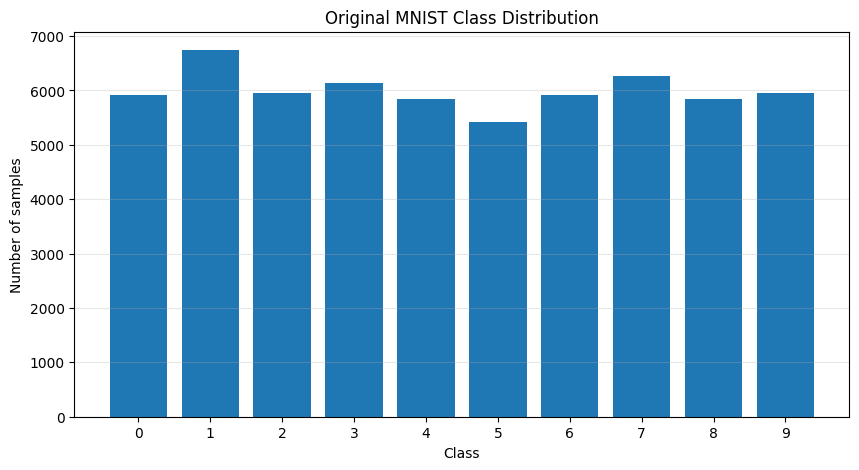

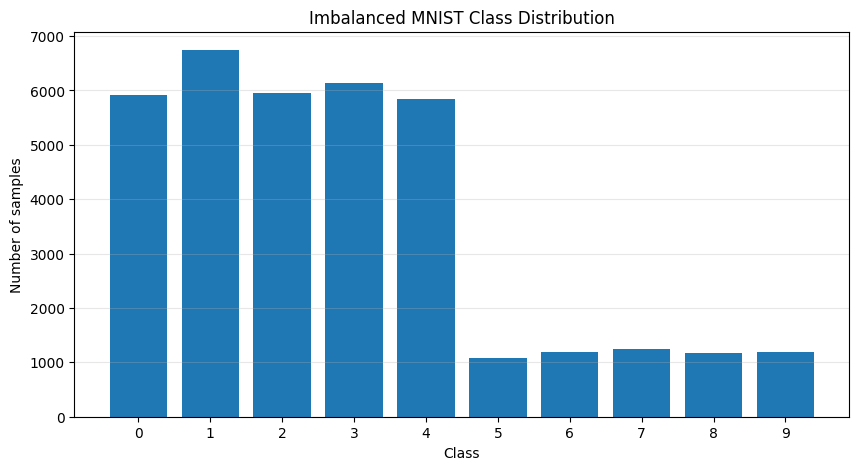

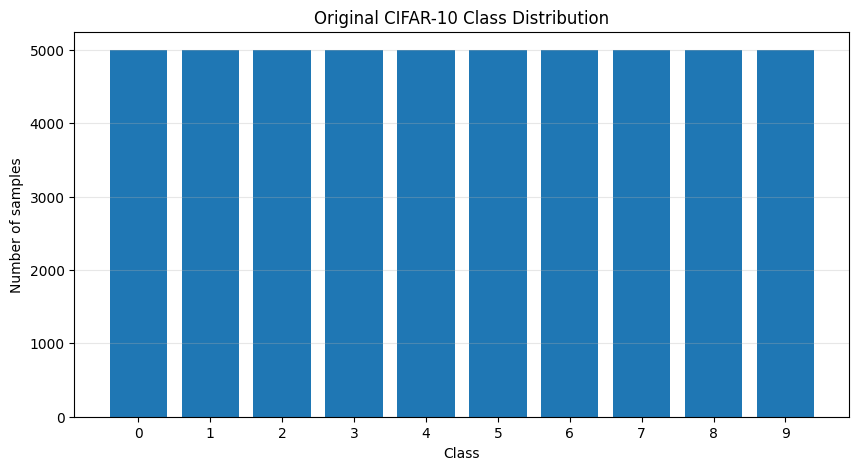

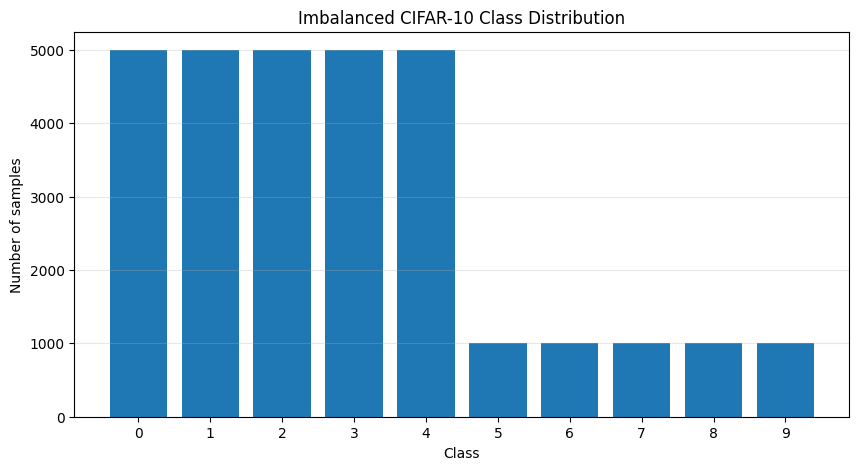

MNIST: Original size: 60000, Imbalanced size: 36479
CIFAR-10: Original size: 50000, Imbalanced size: 30000


In [22]:
# method 4 : create imbalanced dataset
def create_imbalanced_dataset(images, labels, imbalance_ratio=0.2):
    if len(labels.shape) > 1:  # CIFAR-10
        mask = np.ones(len(labels), dtype=bool)
        for i in range(5, 10):
            class_indices = np.where(labels[:, 0] == i)[0]
            remove_count = int(len(class_indices) * (1 - imbalance_ratio))
            if len(class_indices) > 0: 
                remove_indices = np.random.choice(class_indices, remove_count, replace=False)
                mask[remove_indices] = False
        return images[mask], labels[mask]
    else:  # MNIST
        mask = np.ones(len(labels), dtype=bool)
        for i in range(5, 10):
            class_indices = np.where(labels == i)[0]
            remove_count = int(len(class_indices) * (1 - imbalance_ratio))
            if len(class_indices) > 0:
                remove_indices = np.random.choice(class_indices, remove_count, replace=False)
                mask[remove_indices] = False
        return images[mask], labels[mask]

imbalanced_mnist_images, imbalanced_mnist_labels = create_imbalanced_dataset(train_images_mnist, train_labels_mnist)
imbalanced_cifar_images, imbalanced_cifar_labels = create_imbalanced_dataset(train_images_cifar, train_labels_cifar)

# category distribution
def plot_class_distribution(labels, title, is_cifar=False):
    if is_cifar:
        unique, counts = np.unique(labels[:, 0], return_counts=True)
    else:
        unique, counts = np.unique(labels, return_counts=True)
    
    plt.figure(figsize=(10, 5))
    plt.bar(unique, counts)
    plt.xlabel('Class')
    plt.ylabel('Number of samples')
    plt.title(title)
    plt.xticks(unique)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

plot_class_distribution(train_labels_mnist, 'Original MNIST Class Distribution')
plot_class_distribution(imbalanced_mnist_labels, 'Imbalanced MNIST Class Distribution')
plot_class_distribution(train_labels_cifar, 'Original CIFAR-10 Class Distribution', is_cifar=True)
plot_class_distribution(imbalanced_cifar_labels, 'Imbalanced CIFAR-10 Class Distribution', is_cifar=True)

print(f"MNIST: Original size: {len(train_labels_mnist)}, Imbalanced size: {len(imbalanced_mnist_labels)}")
print(f"CIFAR-10: Original size: {len(train_labels_cifar)}, Imbalanced size: {len(imbalanced_cifar_labels)}")

In [23]:
# method 5 : combined 1 and 2
def combined_perturbation(images, noise_std=0.2, blur_sigma=1.0):
    # noise
    noisy = add_gaussian_noise(images, std=noise_std)
    # blur
    blurred = blur_images(noisy, sigma=blur_sigma)
    return blurred

combined_mnist_images = combined_perturbation(train_images_mnist)
combined_mnist_test = combined_perturbation(test_images_mnist)
combined_cifar_images = combined_perturbation(train_images_cifar)
combined_cifar_test = combined_perturbation(test_images_cifar)

In [24]:
# evaluate
def train_and_evaluate(train_images, train_labels, test_images, test_labels, dataset_name, modification_name, epochs=5):
    if dataset_name == "MNIST":
        model = build_cnn((28, 28, 1), 10)
    else:  # CIFAR-10
        model = build_cnn((32, 32, 3), 10)
        
    model.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
    
    # train
    print(f"\nTraining model on {modification_name} {dataset_name} dataset...")
    history = model.fit(
        train_images, train_labels,
        epochs=epochs,
        validation_data=(test_images, test_labels),
        verbose=1
    )
    
    # evaluate
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0) # loss not important
    print(f"{modification_name} {dataset_name} Test Accuracy: {test_acc:.4f}")

    predictions = np.argmax(model.predict(test_images), axis=1)
    
    return model, history, test_acc, predictions

In [25]:
# all mnist
results_mnist = []
mnist_predictions = []  
mnist_model_names = []  

# original model
results_mnist.append(("Original", test_acc_mnist))
# original model prediction
orig_pred_mnist = np.argmax(model_mnist.predict(test_images_mnist), axis=1)
mnist_predictions.append(orig_pred_mnist)
mnist_model_names.append("Original")

# method 1
_, _, acc, pred = train_and_evaluate(noisy_mnist_images, train_labels_mnist, 
                               test_images_mnist, test_labels_mnist, 
                               "MNIST", "Noisy", epochs=10)
results_mnist.append(("Noisy", acc))
mnist_predictions.append(pred)
mnist_model_names.append("Noisy")

# method 2
_, _, acc, pred = train_and_evaluate(blurred_mnist_images, train_labels_mnist, 
                              test_images_mnist, test_labels_mnist, 
                              "MNIST", "Blurred", epochs=10)
results_mnist.append(("Blurred", acc))
mnist_predictions.append(pred)
mnist_model_names.append("Blurred")

# method 3
_, _, acc, pred = train_and_evaluate(train_images_mnist, noisy_mnist_labels, 
                              test_images_mnist, test_labels_mnist, 
                              "MNIST", "Label Noise", epochs=10)
results_mnist.append(("Label Noise", acc))
mnist_predictions.append(pred)
mnist_model_names.append("Label Noise")

# method 4
_, _, acc, pred = train_and_evaluate(imbalanced_mnist_images, imbalanced_mnist_labels, 
                              test_images_mnist, test_labels_mnist, 
                              "MNIST", "Imbalanced", epochs=10)
results_mnist.append(("Imbalanced", acc))
mnist_predictions.append(pred)
mnist_model_names.append("Imbalanced")

# method 5
_, _, acc, pred = train_and_evaluate(combined_mnist_images, train_labels_mnist, 
                              test_images_mnist, test_labels_mnist, 
                              "MNIST", "Combined", epochs=10)
results_mnist.append(("Combined", acc))
mnist_predictions.append(pred)
mnist_model_names.append("Combined")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Training model on Noisy MNIST dataset...
Epoch 1/10


/Users/lqcmacmini/.pyenv/versions/3.10.0/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8446 - loss: 0.4905 - val_accuracy: 0.9746 - val_loss: 0.0788
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9739 - loss: 0.0840 - val_accuracy: 0.9852 - val_loss: 0.0493
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9818 - loss: 0.0584 - val_accuracy: 0.9889 - val_loss: 0.0334
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9864 - loss: 0.0423 - val_accuracy: 0.9876 - val_loss: 0.0388
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9896 - loss: 0.0325 - val_accuracy: 0.9896 - val_loss: 0.0355
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9929 - loss: 0.0230 - val_accuracy: 0.9884 - val_loss: 0.0413
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9939 - loss: 0.0185 - val_accuracy: 0.9884 - val_loss: 0.0456
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9960 - loss: 0.0131 - val

In [26]:
# all cifar
results_cifar = []
cifar_predictions = []  
cifar_model_names = [] 

# original model
results_cifar.append(("Original", test_acc_cifar))
# original model prediction
orig_pred_cifar = np.argmax(model_cifar.predict(test_images_cifar), axis=1)
cifar_predictions.append(orig_pred_cifar)
cifar_model_names.append("Original")

# method 1
_, _, acc, pred = train_and_evaluate(noisy_cifar_images, train_labels_cifar, 
                               test_images_cifar, test_labels_cifar, 
                               "CIFAR-10", "Noisy", epochs=10)
results_cifar.append(("Noisy", acc))
cifar_predictions.append(pred)
cifar_model_names.append("Noisy")

# method 2
_, _, acc, pred = train_and_evaluate(blurred_cifar_images, train_labels_cifar, 
                              test_images_cifar, test_labels_cifar, 
                              "CIFAR-10", "Blurred", epochs=10)
results_cifar.append(("Blurred", acc))
cifar_predictions.append(pred)
cifar_model_names.append("Blurred")

# method 3
_, _, acc, pred = train_and_evaluate(train_images_cifar, noisy_cifar_labels, 
                              test_images_cifar, test_labels_cifar, 
                              "CIFAR-10", "Label Noise", epochs=10)
results_cifar.append(("Label Noise", acc))
cifar_predictions.append(pred)
cifar_model_names.append("Label Noise")

# method 4
_, _, acc, pred = train_and_evaluate(imbalanced_cifar_images, imbalanced_cifar_labels, 
                              test_images_cifar, test_labels_cifar, 
                              "CIFAR-10", "Imbalanced", epochs=10)
results_cifar.append(("Imbalanced", acc))
cifar_predictions.append(pred)
cifar_model_names.append("Imbalanced")

# method 5
_, _, acc, pred = train_and_evaluate(combined_cifar_images, train_labels_cifar, 
                              test_images_cifar, test_labels_cifar, 
                              "CIFAR-10", "Combined", epochs=10)
results_cifar.append(("Combined", acc))
cifar_predictions.append(pred)
cifar_model_names.append("Combined")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Training model on Noisy CIFAR-10 dataset...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.2928 - loss: 1.9231 - val_accuracy: 0.4058 - val_loss: 1.6144
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4728 - loss: 1.4632 - val_accuracy: 0.4733 - val_loss: 1.4654
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5130 - loss: 1.3518 - val_accuracy: 0.5022 - val_loss: 1.3991
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5482 - loss: 1.2643 - val_accuracy: 0.5174 - val_loss: 1.3554
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5690 - loss: 1.2106 - val_accuracy: 0.5339 - val_loss: 1.3148
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5863 - loss: 1.1674 - val_accuracy: 0.5129 - val_loss: 1.4002
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6022 - loss: 1.1267 - val_accuracy: 0.5175 - val_loss: 1.40

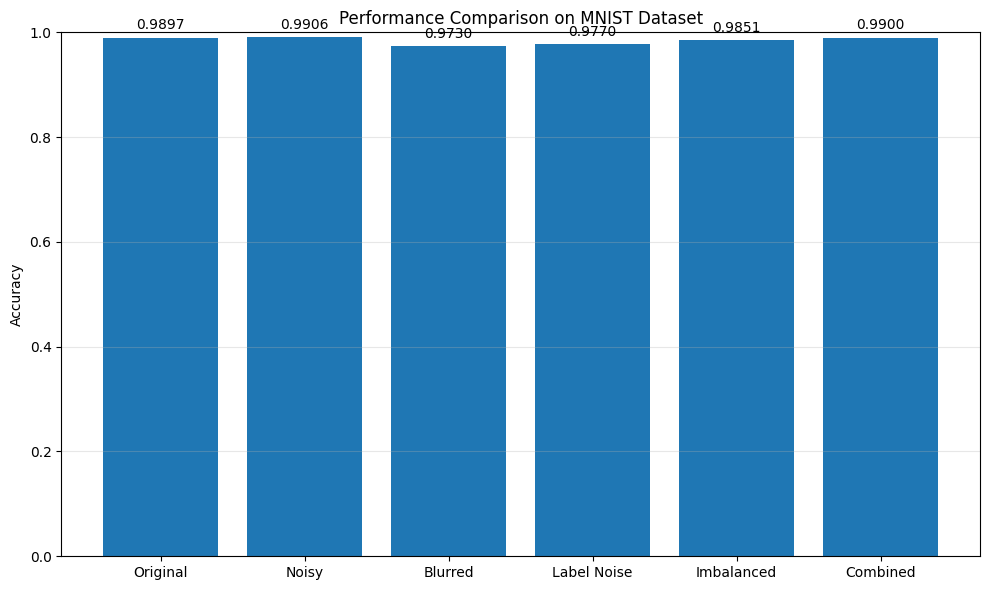

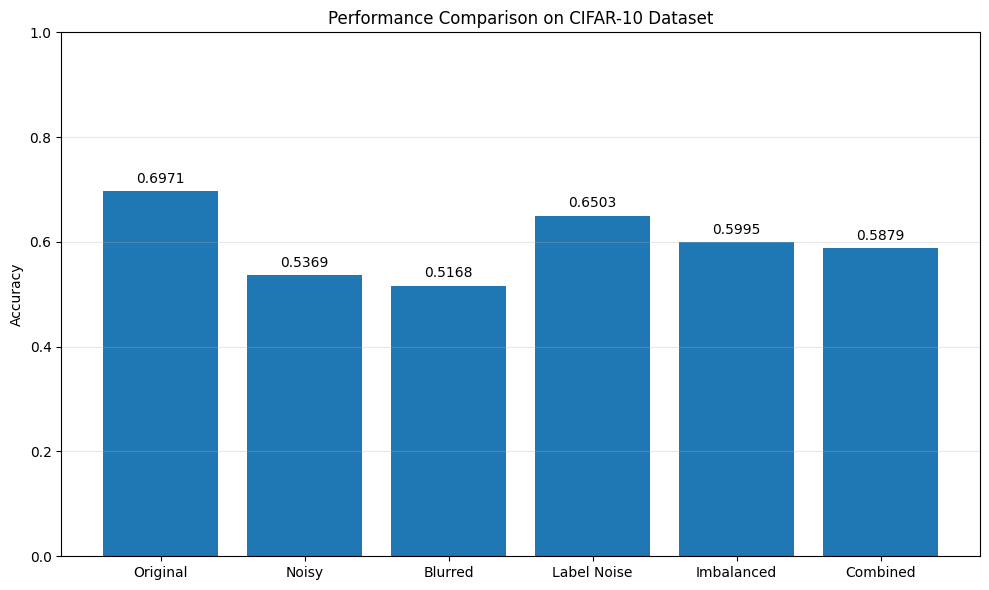


MNIST Results Summary:
Original: 0.9897
Noisy: 0.9906
Blurred: 0.9730
Label Noise: 0.9770
Imbalanced: 0.9851
Combined: 0.9900

CIFAR-10 Results Summary:
Original: 0.6971
Noisy: 0.5369
Blurred: 0.5168
Label Noise: 0.6503
Imbalanced: 0.5995
Combined: 0.5879


In [27]:
# visualize
def plot_results(results, dataset_name):
    methods = [r[0] for r in results]
    accuracies = [r[1] for r in results]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(methods, accuracies)
    plt.ylabel('Accuracy')
    plt.title(f'Performance Comparison on {dataset_name} Dataset')
    plt.ylim(0, 1.0)
    
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{acc:.4f}', 
                ha='center', va='bottom', rotation=0)
    
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_results(results_mnist, "MNIST")
plot_results(results_cifar, "CIFAR-10")

print("\nMNIST Results Summary:")
for method, acc in results_mnist:
    print(f"{method}: {acc:.4f}")

print("\nCIFAR-10 Results Summary:")
for method, acc in results_cifar:
    print(f"{method}: {acc:.4f}")


MNIST McNemar Test:
Original vs Noisy: p=0.4054, not significant (a=9843, b=54, c=63, d=40)
Original vs Blurred: p=0.0000, significant (a=9681, b=216, c=49, d=54)
Original vs Label Noise: p=0.0000, significant (a=9710, b=187, c=60, d=43)
Original vs Imbalanced: p=0.0001, significant (a=9801, b=96, c=50, d=53)
Original vs Combined: p=0.7797, not significant (a=9841, b=56, c=59, d=44)
Noisy vs Original: p=0.4054, not significant (a=9843, b=63, c=54, d=40)
Noisy vs Blurred: p=0.0000, significant (a=9684, b=222, c=46, d=48)
Noisy vs Label Noise: p=0.0000, significant (a=9721, b=185, c=49, d=45)
Noisy vs Imbalanced: p=0.0000, significant (a=9809, b=97, c=42, d=52)
Noisy vs Combined: p=0.5708, not significant (a=9847, b=59, c=53, d=41)
Blurred vs Original: p=0.0000, significant (a=9681, b=49, c=216, d=54)
Blurred vs Noisy: p=0.0000, significant (a=9684, b=46, c=222, d=48)
Blurred vs Label Noise: p=0.0396, significant (a=9561, b=169, c=209, d=61)
Blurred vs Imbalanced: p=0.0000, significant 

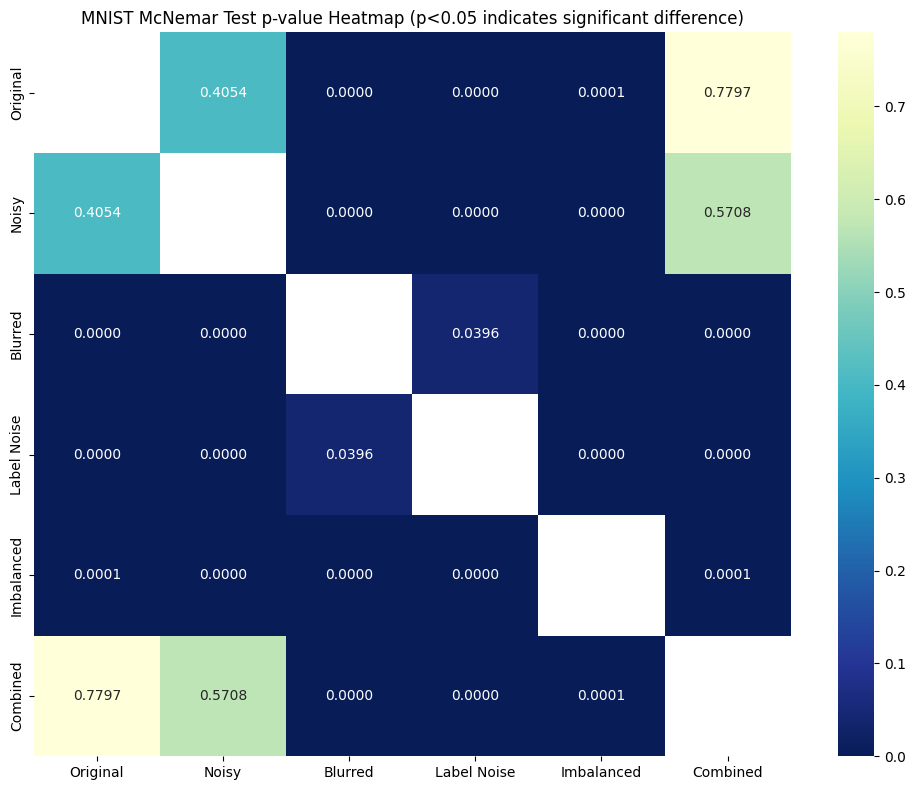


CIFAR-10 McNemar Test:
Original vs Noisy: p=0.0000, significant (a=4647, b=2324, c=722, d=2307)
Original vs Blurred: p=0.0000, significant (a=4420, b=2551, c=748, d=2281)
Original vs Label Noise: p=0.0000, significant (a=5530, b=1441, c=973, d=2056)
Original vs Imbalanced: p=0.0000, significant (a=4959, b=2012, c=1036, d=1993)
Original vs Combined: p=0.0000, significant (a=5052, b=1919, c=827, d=2202)
Noisy vs Original: p=0.0000, significant (a=4647, b=722, c=2324, d=2307)
Noisy vs Blurred: p=0.0003, significant (a=3749, b=1620, c=1419, d=3212)
Noisy vs Label Noise: p=0.0000, significant (a=4340, b=1029, c=2163, d=2468)
Noisy vs Imbalanced: p=0.0000, significant (a=3877, b=1492, c=2118, d=2513)
Noisy vs Combined: p=0.0000, significant (a=4176, b=1193, c=1703, d=2928)
Blurred vs Original: p=0.0000, significant (a=4420, b=748, c=2551, d=2281)
Blurred vs Noisy: p=0.0003, significant (a=3749, b=1419, c=1620, d=3212)
Blurred vs Label Noise: p=0.0000, significant (a=4245, b=923, c=2258, d=2

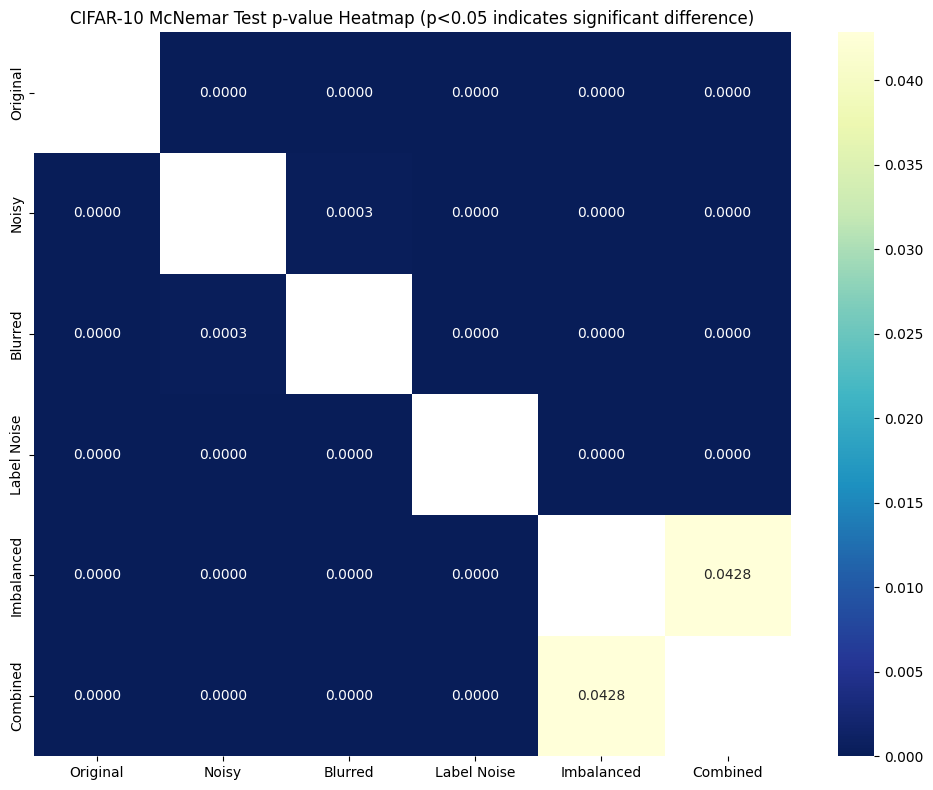

In [ ]:
# Add McNemar test 
from scipy import stats
import seaborn as sns

def mcnemar_test(pred_model1, pred_model2, y_true):
    correct_model1 = (pred_model1 == y_true)
    correct_model2 = (pred_model2 == y_true)
    
    a = np.sum(np.logical_and(correct_model1, correct_model2)) 
    b = np.sum(np.logical_and(correct_model1, np.logical_not(correct_model2)))  
    c = np.sum(np.logical_and(np.logical_not(correct_model1), correct_model2))  
    d = np.sum(np.logical_and(np.logical_not(correct_model1), np.logical_not(correct_model2)))  
    

    if b + c == 0:
        return 1.0, 0.0  
    
    statistic = ((b - c)**2) / (b + c)
    p_value = stats.chi2.sf(statistic, 1)  
    
    return p_value, statistic, a, b, c, d

print("\nMNIST McNemar Test:")
mnist_p_values = np.ones((len(mnist_model_names), len(mnist_model_names)))
for i, model1_name in enumerate(mnist_model_names):
    for j, model2_name in enumerate(mnist_model_names):
        if i != j:  # Don't compare the same model
            p_value, statistic, a, b, c, d = mcnemar_test(
                mnist_predictions[i], mnist_predictions[j], test_labels_mnist)
            mnist_p_values[i, j] = p_value
            print(f"{model1_name} vs {model2_name}: p={p_value:.4f}, " + 
                  f"{'significant' if p_value < 0.05 else 'not significant'} " +
                  f"(a={a}, b={b}, c={c}, d={d})")

plt.figure(figsize=(10, 8))
mask = np.zeros_like(mnist_p_values, dtype=bool)
np.fill_diagonal(mask, True)  
sns.heatmap(mnist_p_values, annot=True, fmt=".4f", cmap="YlGnBu_r", 
           mask=mask, xticklabels=mnist_model_names, yticklabels=mnist_model_names)
plt.title("MNIST McNemar Test p-value Heatmap (p<0.05 indicates significant difference)")
plt.tight_layout()
plt.show()

print("\nCIFAR-10 McNemar Test:")
cifar_p_values = np.ones((len(cifar_model_names), len(cifar_model_names)))
for i, model1_name in enumerate(cifar_model_names):
    for j, model2_name in enumerate(cifar_model_names):
        if i != j:  
            y_true = test_labels_cifar.flatten()
            p_value, statistic, a, b, c, d = mcnemar_test(
                cifar_predictions[i], cifar_predictions[j], y_true)
            cifar_p_values[i, j] = p_value
            print(f"{model1_name} vs {model2_name}: p={p_value:.4f}, " + 
                  f"{'significant' if p_value < 0.05 else 'not significant'} " +
                  f"(a={a}, b={b}, c={c}, d={d})")

plt.figure(figsize=(10, 8))
mask = np.zeros_like(cifar_p_values, dtype=bool)
np.fill_diagonal(mask, True) 
sns.heatmap(cifar_p_values, annot=True, fmt=".4f", cmap="YlGnBu_r", 
           mask=mask, xticklabels=cifar_model_names, yticklabels=cifar_model_names)
plt.title("CIFAR-10 McNemar Test p-value Heatmap (p<0.05 indicates significant difference)")
plt.tight_layout()
plt.show()